In [2]:
import numpy as np
import grid2op
from grid2op.Episode import EpisodeData
import os

In [2]:
path = "C:\\Users\\david\OneDrive\\Documenti\\uni\\Thesis\\Code\\thesis_AI4realnet_distributed-1\\agents_log\\agents_log"


In [14]:
li_episode = EpisodeData.list_episode(path)
full_path, episode_studied = li_episode[0]
this_episode = EpisodeData.from_disk(path, episode_studied)

c:\Users\david\anaconda3\Lib\site-packages\grid2op\Episode\EpisodeData.py:503: UserWarning: You are using a "grid2op compatibility" feature (the data you saved have been saved with a previous grid2op version). When we loaded your data, we attempted to not include most recent grid2op features. This is feature is not well tested. It would be wise to regenerate the data with the latest grid2Op version.
  warnings.warn(


In [15]:
action = this_episode.actions[0]
action.set_bus

array([0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
env = grid2op.make('l2rpn_case14_sandbox')
obs = env.reset()

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [4]:
env.action_space.sub_info

array([3, 6, 4, 6, 5, 7, 3, 2, 5, 3, 3, 3, 4, 3])

In [12]:
env.action_space.dim_topo

57

In [46]:
mask = np.zeros(env.action_space.dim_topo, dtype='int')
i = 0
for sub_id in range(env.action_space.n_sub):
    for j in range(env.action_space.sub_info[sub_id]):
        mask[i] = sub_id
        i += 1
mask

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        7,  7,  8,  8,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 11, 12,
       12, 12, 12, 13, 13, 13])

In [50]:
lengths = []
for i in range(env.action_space.n_sub):
    lengths.append(len(env.action_space.get_all_unitary_topologies_set(env.action_space, i)))


In [48]:
def get_space(sub_id):
    space = env.action_space.get_all_unitary_topologies_set(env.action_space, sub_id)
    vect = []
    for act in space:
        vect.append(act.set_bus)

    return vect

In [56]:
history = []
for i in range(len(li_episode)):
    full_path, episode_studied = li_episode[i]
    this_episode = EpisodeData.from_disk(full_path, episode_studied)

    for k in range(len(this_episode.observations)-1):
        next_state = this_episode.observations[k+1].rho
        curr_state = this_episode.observations[k].rho
        bus_set = this_episode.actions[k].set_bus
        action = np.zeros(obs.n_sub)
        sub = mask[bus_set>0][0]
        vect = get_space(sub)
        a_id = [j for j, e in enumerate(vect) if np.array_equal(e, bus_set)][0]
        action[sub] = a_id/lengths[sub]

        entry = np.concatenate((next_state, curr_state, action))
        history.append(entry)

c:\Users\david\anaconda3\Lib\site-packages\grid2op\Episode\EpisodeData.py:503: UserWarning: You are using a "grid2op compatibility" feature (the data you saved have been saved with a previous grid2op version). When we loaded your data, we attempted to not include most recent grid2op features. This is feature is not well tested. It would be wise to regenerate the data with the latest grid2Op version.
  warnings.warn(


In [57]:
history

[array([0.35714599, 0.2262632 , 0.3662411 , 0.15863042, 0.9468469 ,
        0.25693935, 0.473804  , 0.67983407, 0.52665371, 0.81299382,
        0.11518982, 0.29632425, 0.39863509, 0.5328151 , 0.50021714,
        0.45123607, 0.4098208 , 0.47530097, 0.4809283 , 0.37112534,
        0.30006975, 0.29105237, 0.28445548, 0.22563706, 0.64344299,
        0.18658054, 0.41184998, 0.66669387, 0.52175844, 0.79882878,
        0.10641614, 0.29681855, 0.38574123, 0.50867432, 0.48606485,
        0.43851402, 0.40446931, 0.44795117, 0.46073571, 0.3693943 ,
        0.        , 0.65517241, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.

In [54]:
states = []
actions = []

for i in range(len(li_episode)):
    full_path, episode_studied = li_episode[i]
    this_episode = EpisodeData.from_disk(full_path, episode_studied)

    for obs in this_episode.observations:
        states.append(obs.rho)
    for act in this_episode.actions:
        actions.append(act.set_bus)


c:\Users\david\anaconda3\Lib\site-packages\grid2op\Episode\EpisodeData.py:503: UserWarning: You are using a "grid2op compatibility" feature (the data you saved have been saved with a previous grid2op version). When we loaded your data, we attempted to not include most recent grid2op features. This is feature is not well tested. It would be wise to regenerate the data with the latest grid2Op version.
  warnings.warn(


In [55]:
print(len(states), len(actions))

155 105


In [3]:
path = "C:\\Users\\david\OneDrive\\Documenti\\uni\\Thesis\\Code\\thesis_AI4realnet_distributed-1\\agents_log\\agents_log"
env = grid2op.make("l2rpn_case14_sandbox")
obs = env.reset()

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [4]:
full_obs_dim = dict(zip(obs.attr_list_vect, env.observation_space.shape))

o_start_idx = 0
o_end_idx = 0
for attr_name, dim in full_obs_dim.items():
    o_end_idx = o_start_idx + dim
    
    if attr_name == 'rho':
        break
    else:
        o_start_idx = o_end_idx

In [5]:
connections = env.action_space.sub_info

sub_start = []
sub_end = []
start = 0
end = 0
for n in connections:
    sub_start.append(start)
    end = start + n
    sub_end.append(end)
    start = end

In [16]:
sub_start

[0, 3, 9, 13, 19, 24, 31, 34, 36, 41, 44, 47, 50, 54]

In [7]:
full_acts_dim = dict(zip(env.action_space.attr_list_vect, env.action_space.shape))

a_start_idx = 0
a_end_idx = 0
for attr_name, dim in full_acts_dim.items():
    a_end_idx = a_start_idx + dim
    
    if attr_name == '_set_topo_vect':
        break
    else:
        a_start_idx = a_end_idx

In [10]:
next_state = []
curr_state = []
actions = []
for dire in os.listdir(path):

    d_path = os.path.join(path, dire)
    if os.path.isdir(d_path):
        o_path = os.path.join(d_path, 'observations.npz')
        a_path = os.path.join(d_path, 'actions.npz')

        obs = np.load(o_path)['data']
        obs = obs[~np.isnan(obs).all(axis=1)]
        obs = obs[:, o_start_idx:o_end_idx]
        curr_state.extend(obs[:-1])
        next_state.extend(obs[1:])

        acts = np.load(a_path)['data']
        acts = acts[~np.isnan(acts).all(axis=1)]
        acts = acts[:, a_start_idx:a_end_idx]
        actions.extend(acts)

In [12]:
n_sub = len(connections)
actions = np.array(actions)
H = actions.shape[0]

actions_by_sub = np.zeros((H,n_sub))

for sub_id in range(n_sub):
    sub_act = actions[:, sub_start[sub_id]:sub_end[sub_id]]
    u_act, act_to_int = np.unique(sub_act, axis=0, return_inverse=True)
    actions_by_sub[:, sub_id] = act_to_int/u_act.shape[0]

In [27]:
next_state = np.array(next_state)
curr_state = np.array(curr_state)

In [35]:
history = np.append(next_state, curr_state, axis=1)
history = np.append(history, actions_by_sub,axis=1)

In [37]:
history.shape

(105, 54)

In [38]:
env = grid2op.make("l2rpn_wcci_2022")

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



In [40]:
len(env.action_space.get_all_unitary_topologies_set(env.action_space, sub_id=2))

7

### Verify that the same chronic is played differently across episodes

In [1]:
import pandas as pd
import numpy as np

In [2]:
header = ["id_chron", "name_chron", "cum_reward", "nb_time_step", "max_ts"]
df = pd.read_csv('res.csv', names=header)

In [3]:
df

,id_chron,name_chron,cum_reward,nb_time_step,max_ts
0,/home/gianvito/data_grid2op/l2rpn_case14_sandb...,0,117.374390,3,8064
1,/home/gianvito/data_grid2op/l2rpn_case14_sandb...,12,116.938232,3,8064
2,/home/gianvito/data_grid2op/l2rpn_case14_sandb...,24,-10.000000,1,8064
3,/home/gianvito/data_grid2op/l2rpn_case14_sandb...,36,54.266022,2,8064
4,/home/gianvito/data_grid2op/l2rpn_case14_sandb...,48,-10.000000,1,8064
...,...,...,...,...,...
1095,/home/gianvito/data_grid2op/l2rpn_case14_sandb...,39,613.835144,11,8064
1096,/home/gianvito/data_grid2op/l2rpn_case14_sandb...,51,121.403870,3,8064
1097,/home/gianvito/data_grid2op/l2rpn_case14_sandb...,63,53.208351,2,8064
1098,/home/gianvito/data_grid2op/l2rpn_case14_sandb...,75,-10.000000,1,8064


In [4]:
df[df["name_chron"] == 0]

,id_chron,name_chron,cum_reward,nb_time_step,max_ts
0,/home/gianvito/data_grid2op/l2rpn_case14_sandb...,0,117.374390,3,8064
819,/home/gianvito/data_grid2op/l2rpn_case14_sandb...,0,181.279602,4,8064


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
cmi = [[0, 0.48527, 0.813049, 0.127149, 0.600544, 0.132127, 0, 0, 0.207164, 0, 0, 0, 0.248854, 0],
       [0, 0.17418, 0.730593, 0.126274, 0.726384, 0.152088, 0, 0, 0.0982301, 0, 0, 0, 0.210452, 0],
       [0, 0.371139, 1.44456, 0.37423, 0.50489, 0.175492, 0, 0, 0.262091, 0, 0, 0, 0.340557, 0],
       [0, 0.406235, 1.06189, 0.202762, 0.31206, 0.153529, 0, 0, 0.236446, 0, 0, 0, 0.270364, 0],
       [0, 0.22531, 0.857816, 0.22586, 0.919985, 0.206585, 0, 0, -0.135483, 0, 0, 0, -0.0360046, 0],
       [0, 0.129887, 1.39499, 0.245927, -0.045075, 0.161433, 0, 0, 0.080621, 0, 0, 0, 0.450465, 0],
       [0, 0.433195, 1.38743, 0.636736, 0.697107, 0.268043, 0, 0, 0.841752, 0, 0, 0, 0.562351, 0],
       [0, -0.123059, 0.666384, 0.308436, -0.0209037, 0.189277, 0, 0, 0.953609, 0, 0, 0, 0.622027, 0],
       [0, -0.0621998, 0.321573, 0.143599, -0.325458, 0.324122, 0, 0, 0.971307, 0, 0, 0, 0.963372, 0],
       [0, -0.0500818, 0.323172, 0.269848, -0.299105, 0.334376, 0, 0, 0.880279, 0, 0, 0, 1.03395, 0],
       [0, -0.0187413, 0.879397, 0.186475, 0.0752988, 0.11088, 0, 0, 0.950395, 0, 0, 0, 0.560809, 0],
       [0, -0.0611182, 0.533538, 0.0922114, -0.214579, 0.167419, 0, 0, 1.1531, 0, 0, 0, 0.933847, 0],
       [0, -0.0405485, 0.670167, 0.362514, -0.139324, 0.249573, 0, 0, 1.19399, 0, 0, 0, 0.747991, 0],
       [0, -0.0393884, 0.595862, 0.329504, -0.191591, 0.0884022, 0, 0, 1.29342, 0, 0, 0, 0.79983, 0],
       [0, -0.00538117, 0.596515, 0.361291, -0.264112, 0.241623, 0, 0, 1.38218, 0, 0, 0, 0.836044, 0],
       [0, -0.044617, 0.570433, 0.348277, -0.269311, 0.34156, 0, 0, 0.886336, 0, 0, 0, 0.438902, 0],
       [0, -0.0708446, 0.438306, 0.212156, -0.0915971, 0.340882, 0, 0, 1.21022, 0, 0, 0, 0.513524, 0],
       [0, -0.0429382, 0.256864, 0.159988, 0.270454, 0.207801, 0, 0, 0.189004, 0, 0, 0, 0.478137, 0],
       [0, 0.0059104, 0.820402, 0.33524, -0.111216, 0.377152, 0, 0, 1.46007, 0, 0, 0, 0.908994, 0],
       [0, -0.0567474, 0.414901, 0.187251, -0.20952, 0.305306, 0, 0, 1.27023, 0, 0, 0, 0.646112, 0]]

with open('case_14_actions.npy', 'wb') as f:
    np.save(f, cmi)

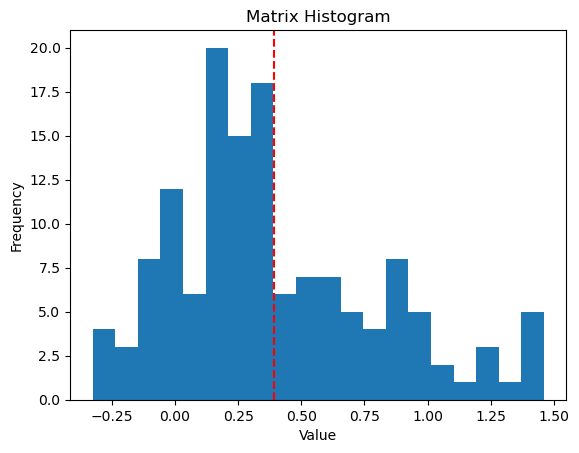

In [18]:
cmi = np.array(cmi).flatten()
cmi = cmi[cmi != 0]
mean = np.mean(cmi)


plt.hist(cmi, bins=20)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.axvline(x=mean, color='red', linestyle='--')
plt.title("Matrix Histogram")
plt.show()

In [5]:
with open('mi_case14_sub1.npy', 'rb') as f:
    mi = np.load(f)

mi.shape

(20, 34)

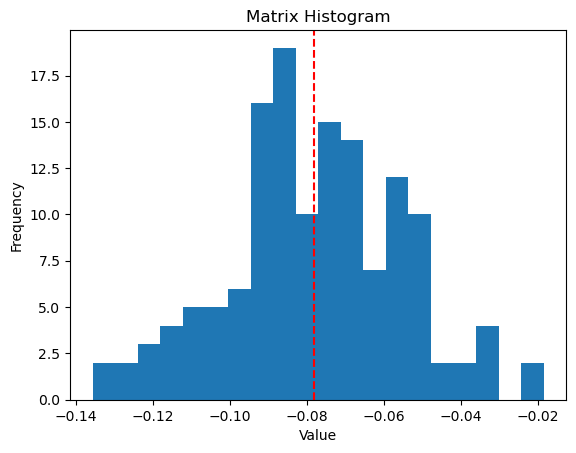

In [5]:
mi = np.array(mi).flatten()
mi = mi[mi != 0]
mean = np.mean(mi)


plt.hist(mi, bins=20)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.axvline(x=mean, color='red', linestyle='--')
plt.title("Matrix Histogram")
plt.show()

In [6]:
df = pd.DataFrame(mi)
df

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.015502,-0.015502,0.0,0.0,-0.015502,0.0,0.0,0.0,-0.015502,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000223,-0.000223,0.0,0.0,-0.000223,0.0,0.0,0.0,-0.000223,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000296,-0.000296,0.0,0.0,-0.000296,0.0,0.0,0.0,-0.000296,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000234,-0.000234,0.0,0.0,-0.000234,0.0,0.0,0.0,-0.000234,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025948,0.025948,0.0,0.0,0.025948,0.0,0.0,0.0,0.025948,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000196,-0.000196,0.0,0.0,-0.000196,0.0,0.0,0.0,-0.000196,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000288,-0.000288,0.0,0.0,-0.000288,0.0,0.0,0.0,-0.000288,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000198,-0.000198,0.0,0.0,-0.000198,0.0,0.0,0.0,-0.000198,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000200,-0.000200,0.0,0.0,-0.000200,0.0,0.0,0.0,-0.000200,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000200,-0.000200,0.0,0.0,-0.000200,0.0,0.0,0.0,-0.000200,0.0


In [11]:
import numpy as np
import pandas as pd

In [7]:
with open('mi_case14.npy', 'rb') as f:
    mi = np.load(f)

In [8]:
pd.DataFrame(mi)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.096418,-0.091386,0.0,0.0,-0.084307,0.0,0.0,0.0,-0.131532,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.061423,-0.083462,0.0,0.0,-0.086527,0.0,0.0,0.0,-0.125942,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.076928,-0.077032,0.0,0.0,-0.072856,0.0,0.0,0.0,-0.113363,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.096819,-0.092555,0.0,0.0,-0.082281,0.0,0.0,0.0,-0.134494,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.085509,-0.052408,0.0,0.0,-0.087714,0.0,0.0,0.0,-0.081981,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.090916,-0.093010,0.0,0.0,-0.084480,0.0,0.0,0.0,-0.126797,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.074461,-0.065084,0.0,0.0,-0.081731,0.0,0.0,0.0,-0.118378,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.060846,-0.092780,0.0,0.0,-0.111355,0.0,0.0,0.0,-0.084957,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.078025,-0.057035,0.0,0.0,-0.091581,0.0,0.0,0.0,-0.102846,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.068616,-0.068128,0.0,0.0,-0.091715,0.0,0.0,0.0,-0.075966,0.0
